In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
file = "breast-cancer-wisconsin.data.txt"
df = pd.read_csv(file)

In [ ]:
df

,1000025,5,1,1.1,1.2,2,1.3,3,1.4,1.5,2.1
0,1002945,5,4,4,5,7,10,3,2,1,2
1,1015425,3,1,1,1,2,2,3,1,1,2
2,1016277,6,8,8,1,3,4,3,7,1,2
3,1017023,4,1,1,3,2,1,3,1,1,2
4,1017122,8,10,10,8,7,10,9,7,1,4
...,...,...,...,...,...,...,...,...,...,...,...
693,776715,3,1,1,1,3,2,1,1,1,2
694,841769,2,1,1,1,2,1,1,1,1,2
695,888820,5,10,10,3,7,3,8,10,2,4
696,897471,4,8,6,4,3,4,10,6,1,4


In [ ]:
df.columns

Index(['1000025', '5', '1', '1.1', '1.2', '2', '1.3', '3', '1.4', '1.5',
       '2.1'],
      dtype='object')

In [ ]:
col_names = ['Id', 'Clump_thickness', 'Uniformity_Cell_Size', 'Uniformity_Cell_Shape', 'Marginal_Adhesion',
             'Single_Epithelial_Cell_Size', 'Bare_Nuclei', 'Bland_Chromatin', 'Normal_Nucleoli', 'Mitoses', 'Class']
df.columns = col_names
df.columns

Index(['Id', 'Clump_thickness', 'Uniformity_Cell_Size',
       'Uniformity_Cell_Shape', 'Marginal_Adhesion',
       'Single_Epithelial_Cell_Size', 'Bare_Nuclei', 'Bland_Chromatin',
       'Normal_Nucleoli', 'Mitoses', 'Class'],
      dtype='object')

In [ ]:
df

,Id,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1002945,5,4,4,5,7,10,3,2,1,2
1,1015425,3,1,1,1,2,2,3,1,1,2
2,1016277,6,8,8,1,3,4,3,7,1,2
3,1017023,4,1,1,3,2,1,3,1,1,2
4,1017122,8,10,10,8,7,10,9,7,1,4
...,...,...,...,...,...,...,...,...,...,...,...
693,776715,3,1,1,1,3,2,1,1,1,2
694,841769,2,1,1,1,2,1,1,1,1,2
695,888820,5,10,10,3,7,3,8,10,2,4
696,897471,4,8,6,4,3,4,10,6,1,4


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 698 entries, 0 to 697
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Id                           698 non-null    int64 
 1   Clump_thickness              698 non-null    int64 
 2   Uniformity_Cell_Size         698 non-null    int64 
 3   Uniformity_Cell_Shape        698 non-null    int64 
 4   Marginal_Adhesion            698 non-null    int64 
 5   Single_Epithelial_Cell_Size  698 non-null    int64 
 6   Bare_Nuclei                  698 non-null    object
 7   Bland_Chromatin              698 non-null    int64 
 8   Normal_Nucleoli              698 non-null    int64 
 9   Mitoses                      698 non-null    int64 
 10  Class                        698 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


In [ ]:
df.Class.value_counts()/len(df)
# 2 stands for benign cancer
# 4 stands for malignant cancer

# y=f(X) classification task

2    0.654728
4    0.345272
Name: Class, dtype: float64

In [ ]:
# good practice: train_test_split needs to have test reflecting the imbalance
# the train balanced it out: 50/50

In [ ]:
df["Bare_Nuclei"].value_counts()
#it seems 

1     401
10    132
2      30
5      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: Bare_Nuclei, dtype: int64

In [ ]:
#df["Bare_Nuclei"]= df["Bare_Nuclei"].astype("int64").astype("float") 
# there are ? on the dataset that we will interpret as null values
df["Bare_Nuclei"]= pd.to_numeric(df["Bare_Nuclei"], errors="coerce")

In [ ]:
df["Bare_Nuclei"].value_counts()

1.0     401
10.0    132
2.0      30
5.0      30
3.0      28
8.0      21
4.0      19
9.0       9
7.0       8
6.0       4
Name: Bare_Nuclei, dtype: int64

In [ ]:
df.isnull().sum()

Id                              0
Clump_thickness                 0
Uniformity_Cell_Size            0
Uniformity_Cell_Shape           0
Marginal_Adhesion               0
Single_Epithelial_Cell_Size     0
Bare_Nuclei                    16
Bland_Chromatin                 0
Normal_Nucleoli                 0
Mitoses                         0
Class                           0
dtype: int64

In [ ]:
16/len(df)

0.022922636103151862

In [ ]:
df=df.dropna()

In [ ]:
df.isna().sum()

Id                             0
Clump_thickness                0
Uniformity_Cell_Size           0
Uniformity_Cell_Shape          0
Marginal_Adhesion              0
Single_Epithelial_Cell_Size    0
Bare_Nuclei                    0
Bland_Chromatin                0
Normal_Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

In [ ]:
# correlations of the variables

,Id,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
Id,1.000000,-0.056316,-0.041539,-0.042373,-0.069768,-0.048756,-0.099411,-0.062002,-0.050824,-0.038039,-0.084869
Clump_thickness,-0.056316,1.000000,0.642936,0.653968,0.488175,0.523891,0.593524,0.553825,0.534406,0.351100,0.715306
Uniformity_Cell_Size,-0.041539,0.642936,1.000000,0.907158,0.706786,0.753415,0.691487,0.755663,0.719173,0.460603,0.820667
Uniformity_Cell_Shape,-0.042373,0.653968,0.907158,1.000000,0.685735,0.722313,0.713661,0.735460,0.717784,0.441096,0.821749
Marginal_Adhesion,-0.069768,0.488175,0.706786,0.685735,1.000000,0.594340,0.670434,0.668613,0.602893,0.418734,0.706097
Single_Epithelial_Cell_Size,-0.048756,0.523891,0.753415,0.722313,0.594340,1.000000,0.585489,0.618135,0.628743,0.480451,0.690789
Bare_Nuclei,-0.099411,0.593524,0.691487,0.713661,0.670434,0.585489,1.000000,0.680689,0.584022,0.339005,0.822563
Bland_Chromatin,-0.062002,0.553825,0.755663,0.735460,0.668613,0.618135,0.680689,1.000000,0.665638,0.345957,0.758350
Normal_Nucleoli,-0.050824,0.534406,0.719173,0.717784,0.602893,0.628743,0.584022,0.665638,1.000000,0.433602,0.718499
Mitoses,-0.038039,0.351100,0.460603,0.441096,0.418734,0.480451,0.339005,0.345957,0.433602,1.000000,0.423278


In [ ]:
df= df.drop("Id", axis=1)

In [ ]:
df

,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,5,4,4,5,7,10.0,3,2,1,2
1,3,1,1,1,2,2.0,3,1,1,2
2,6,8,8,1,3,4.0,3,7,1,2
3,4,1,1,3,2,1.0,3,1,1,2
4,8,10,10,8,7,10.0,9,7,1,4
...,...,...,...,...,...,...,...,...,...,...
693,3,1,1,1,3,2.0,1,1,1,2
694,2,1,1,1,2,1.0,1,1,1,2
695,5,10,10,3,7,3.0,8,10,2,4
696,4,8,6,4,3,4.0,10,6,1,4


In [ ]:
correlation = df.corr()
correlation

,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
Clump_thickness,1.000000,0.642936,0.653968,0.488175,0.523891,0.593524,0.553825,0.534406,0.351100,0.715306
Uniformity_Cell_Size,0.642936,1.000000,0.907158,0.706786,0.753415,0.691487,0.755663,0.719173,0.460603,0.820667
Uniformity_Cell_Shape,0.653968,0.907158,1.000000,0.685735,0.722313,0.713661,0.735460,0.717784,0.441096,0.821749
Marginal_Adhesion,0.488175,0.706786,0.685735,1.000000,0.594340,0.670434,0.668613,0.602893,0.418734,0.706097
Single_Epithelial_Cell_Size,0.523891,0.753415,0.722313,0.594340,1.000000,0.585489,0.618135,0.628743,0.480451,0.690789
Bare_Nuclei,0.593524,0.691487,0.713661,0.670434,0.585489,1.000000,0.680689,0.584022,0.339005,0.822563
Bland_Chromatin,0.553825,0.755663,0.735460,0.668613,0.618135,0.680689,1.000000,0.665638,0.345957,0.758350
Normal_Nucleoli,0.534406,0.719173,0.717784,0.602893,0.628743,0.584022,0.665638,1.000000,0.433602,0.718499
Mitoses,0.351100,0.460603,0.441096,0.418734,0.480451,0.339005,0.345957,0.433602,1.000000,0.423278
Class,0.715306,0.820667,0.821749,0.706097,0.690789,0.822563,0.758350,0.718499,0.423278,1.000000


In [ ]:
correlation["Class"].sort_values(ascending=False)

Class                          1.000000
Bare_Nuclei                    0.822563
Uniformity_Cell_Shape          0.821749
Uniformity_Cell_Size           0.820667
Bland_Chromatin                0.758350
Normal_Nucleoli                0.718499
Clump_thickness                0.715306
Marginal_Adhesion              0.706097
Single_Epithelial_Cell_Size    0.690789
Mitoses                        0.423278
Name: Class, dtype: float64

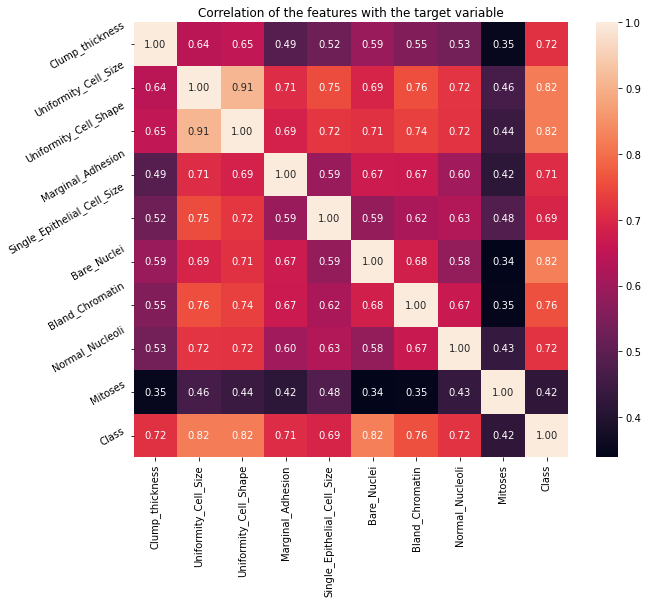

In [ ]:
# heatmap

plt.figure(figsize=(10,8))
plt.title("Correlation of the features with the target variable")
a = sns.heatmap(correlation, square=True, annot=True, fmt= ".2f", linecolor="white")
a.set_xticklabels(a.get_xticklabels(), rotation =90)
a.set_yticklabels(a.get_yticklabels(), rotation =30)
plt.show()

In [ ]:
# Predictive modeling

In [ ]:
X= df.drop("Class", axis=1)
y = df["Class"]

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
# train test split (not correctly done: we need the test set to reflect the imbalance of dataset)

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=0)

In [ ]:
X_test

,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses
115,8,3,3,1,2,2.0,3,2,1
392,1,1,1,1,1,1.0,1,1,1
316,6,8,7,8,6,8.0,8,9,1
519,1,1,1,1,3,1.0,1,1,1
313,1,1,1,1,1,1.0,2,1,1
...,...,...,...,...,...,...,...,...,...
21,3,1,1,1,2,1.0,2,1,1
469,3,1,1,1,1,1.0,2,1,1
521,10,4,5,4,3,5.0,7,3,1
515,1,1,1,1,1,1.0,1,1,1


In [ ]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# KNN with n=3

# instance of the model
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
## predictions on the test set
# y= f(X)

y_pred = knn.predict(X_test)

In [ ]:
# accuracy of the model on the test set
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9635036496350365

In [ ]:
y_test.value_counts()

2    92
4    45
Name: Class, dtype: int64

In [ ]:
# k= 6

knn= KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
accuracy_score(y_test, y_pred)

0.9635036496350365

In [ ]:
# k= 6

knn= KNeighborsClassifier(n_neighbors=20)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
accuracy_score(y_test, y_pred)

0.9635036496350365

In [ ]:
knn= KNeighborsClassifier(n_neighbors=100)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
accuracy_score(y_test, y_pred)

0.9562043795620438

In [ ]:
knn= KNeighborsClassifier(n_neighbors=89)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
accuracy_score(y_test, y_pred)

0.9562043795620438

Maximum accuracy:  0.9708029197080292  at K  5


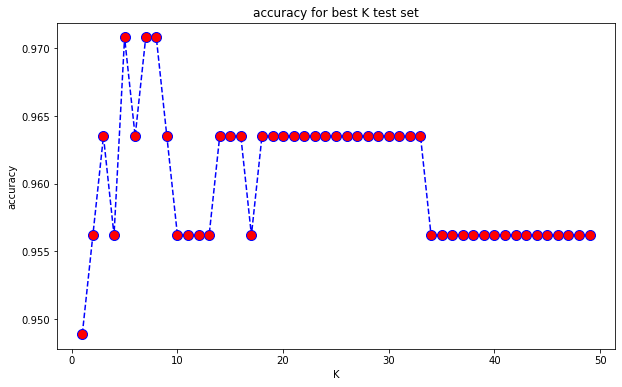

In [ ]:
# check visually how to choose K with accuracy test set

#accuracy=[.., ..., ..., ..., ..., ]
accuracy=[]

for neighbor in range(1,50):
    knn= KNeighborsClassifier(n_neighbors=neighbor)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    accuracy.append(accuracy_score(y_test, y_pred))
    
    
plt.figure(figsize=(10,6))
plt.plot(range(1,50), accuracy, color="blue", linestyle="dashed",
         marker = "o", markerfacecolor="red", markersize=10)
plt.title("accuracy for best K test set")
plt.xlabel("K")
plt.ylabel("accuracy")
print("Maximum accuracy: ", max(accuracy), " at K ", accuracy.index(max(accuracy))+1)
      



Maximum f1score:  0.9709598557583322  at K = 5


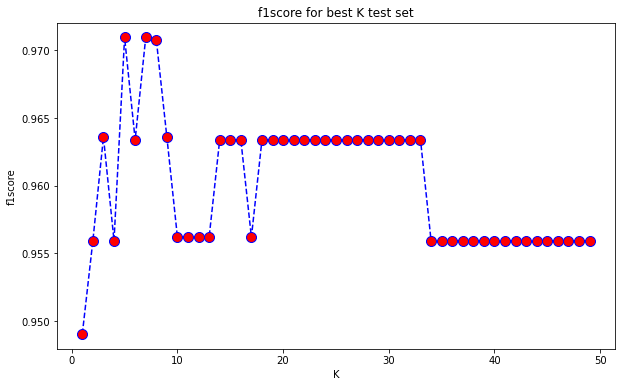

In [ ]:
from sklearn.metrics import f1_score
#f1 score on the test set

f1score=[]

for neighbor in range(1,50):
    knn= KNeighborsClassifier(n_neighbors=neighbor)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    f1score.append(f1_score(y_test, y_pred, average='weighted'))
    
    
plt.figure(figsize=(10,6))
plt.plot(range(1,50), f1score, color="blue", linestyle="dashed",
         marker = "o", markerfacecolor="red", markersize=10)
plt.title("f1score for best K test set")
plt.xlabel("K")
plt.ylabel("f1score")
print("Maximum f1score: ", max(f1score), " at K =", f1score.index(max(f1score))+1)
      


Maximum f1score:  1.0  at K = 1


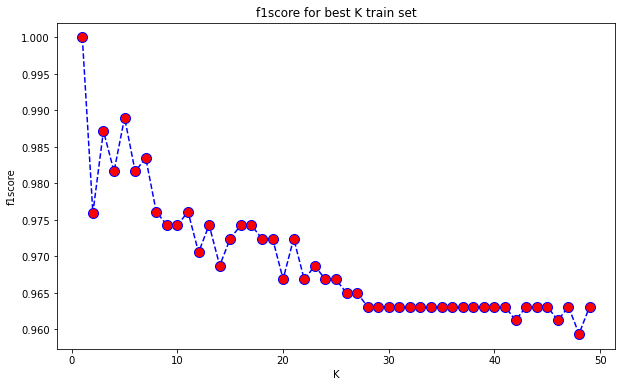

In [ ]:
# train set

from sklearn.metrics import f1_score


f1score=[]

for neighbor in range(1,50):
    knn= KNeighborsClassifier(n_neighbors=neighbor) # model is created with K= k on the loop
    knn.fit(X_train,y_train) # model is trained
    pred_train = knn.predict(X_train) # predictions on train set
    f1score.append(f1_score(y_train, pred_train, average='weighted'))
    
    
plt.figure(figsize=(10,6))
plt.plot(range(1,50), f1score, color="blue", linestyle="dashed",
         marker = "o", markerfacecolor="red", markersize=10)
plt.title("f1score for best K train set")
plt.xlabel("K")
plt.ylabel("f1score")
print("Maximum f1score: ", max(f1score), " at K =", f1score.index(max(f1score))+1)
      



In [ ]:
# model f

#predictions y_pred
# real y
# error: y_pred != y

Minimum error rate:  0.029197080291970802  at K  5


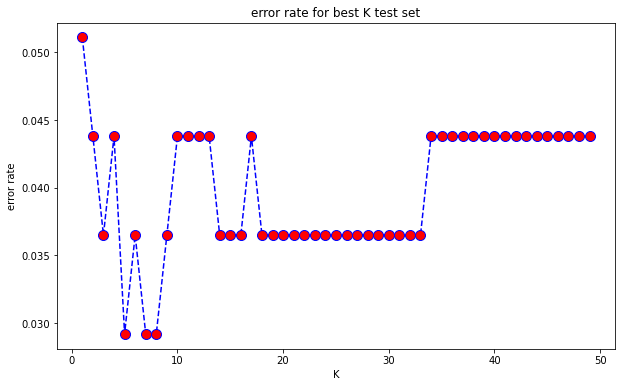

In [ ]:
# check visually how to choose K with error rate

#accuracy=[.., ..., ..., ..., ..., ]
error_rate=[]

for neighbor in range(1,50):
    knn= KNeighborsClassifier(n_neighbors=neighbor)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    error_rate.append(np.mean(y_pred != y_test))
    
    
plt.figure(figsize=(10,6))
plt.plot(range(1,50), error_rate, color="blue", linestyle="dashed",
         marker = "o", markerfacecolor="red", markersize=10)
plt.title("error rate for best K test set")
plt.xlabel("K")
plt.ylabel("error rate")
print("Minimum error rate: ", min(error_rate), " at K ", error_rate.index(min(error_rate))+1)
      

